### Check FDTs for K2 components

Anxiang's FDTs with bosonic (merged) index in the third slot.
**(a)**
$$
K_2^{112} = \tanh\tfrac{\beta\omega_1}{2} \left[ 
(K_2^{221})^* - K_2^{212}
\right] 
+ \tanh\tfrac{\beta\omega_2}{2} \left[ 
(K_2^{221})^* - K_2^{122}
\right]
$$

**(b)**
$$
K_2^{121} = \tanh\tfrac{\beta\omega_1}{2} \left[ 
(K_2^{212})^* - K_2^{221}
\right]
+ \coth\tfrac{\beta\omega_3}{2} \left[ 
(K_2^{212})^* - K_2^{122}
\right]
$$

**(c)**
$$
K_2^{211} = \tanh\tfrac{\beta\omega_2}{2} \left[ 
(K_2^{122})^* - K_2^{221}
\right]
+ \coth\tfrac{\beta\omega_3}{2} \left[ 
(K_2^{122})^* - K_2^{212}
\right]
$$

**(d)**
$$
\begin{aligned}
K_2^{111} &= 
\tanh\tfrac{\beta\omega_2}{2} \coth\tfrac{\beta\omega_3}{2} K_2^{122}
+ \tanh\tfrac{\beta\omega_1}{2} \coth\tfrac{\beta\omega_3}{2} K_2^{212} \\
&\quad + \tanh\tfrac{\beta\omega_1}{2} \tanh\tfrac{\beta\omega_2}{2} K_2^{221} \\
&\quad + \left[
(1+\tanh\tfrac{\beta\omega_2}{2} \coth\tfrac{\beta\omega_3}{2}) K_2^{122}
\right. \\
&\qquad + (1+\tanh\tfrac{\beta\omega_1}{2} \coth\tfrac{\beta\omega_3}{2}) K_2^{212} \\
&\qquad \left. + (1+\tanh\tfrac{\beta\omega_1}{2} \tanh\tfrac{\beta\omega_2}{2}) K_2^{221}
\right]^*
\end{aligned}
$$

To convert to our convention:
- expand 1->12, 2->11 in the third slot.
- swap second and third Keldysh index

In [104]:
using TCI4Keldysh
using PythonCall
using PythonPlot

### $K_{2'}^p$

In [170]:
PSFpath = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
base_path = "SIAM_u=0.50"
channel = "pQFT"
flavor_idx = 2
(γ, sigmak) = TCI4Keldysh.read_broadening_params(base_path; channel=channel)
broadening_kwargs = TCI4Keldysh.read_broadening_settings(joinpath(TCI4Keldysh.datadir(), base_path); channel=channel)
broadening_kwargs[:estep] = 50
broadening_kwargs[:emin] = 2.5e-5
broadening_kwargs[:emax] = 30.0;

In [171]:
ommax = 3.18
R = 5
prime = true
ωs_ext = ntuple(_ -> TCI4Keldysh.KF_grid_bos(ommax, 5), 2)

K2pprime = TCI4Keldysh.precompute_K2r(
        PSFpath, flavor_idx, "KF";
        ωs_ext=ωs_ext,
        channel=channel,
        prime=prime,
        broadening_kwargs...
        )
nothing

Loading stuff:   0.002286 seconds (462 allocations: 202.172 KiB)
Creating Broadened PSFs:   9.805203 seconds (870.74 k allocations: 16.148 GiB, 14.54% gc time)
All the rest:   1.156700 seconds (605 allocations: 327.109 MiB, 46.85% gc time)
Loading stuff:   0.004936 seconds (462 allocations: 202.172 KiB)
Creating Broadened PSFs:   9.449139 seconds (870.67 k allocations: 16.148 GiB, 15.17% gc time)
All the rest:   0.923678 seconds (605 allocations: 327.109 MiB, 52.25% gc time)
Loading stuff:   0.003798 seconds (462 allocations: 202.172 KiB)
Creating Broadened PSFs:   9.138443 seconds (870.67 k allocations: 16.149 GiB, 14.14% gc time)
All the rest:   0.928238 seconds (603 allocations: 328.643 MiB, 56.10% gc time)
Loading stuff:   0.003683 seconds (462 allocations: 202.172 KiB)
Creating Broadened PSFs:   9.741991 seconds (870.67 k allocations: 16.149 GiB, 13.14% gc time)
All the rest:   1.159285 seconds (605 allocations: 328.643 MiB, 48.48% gc time)
  Compute K2...
size of Σ_vec:(65, 2, 2)

Setup

In [176]:
ωconvMat = TCI4Keldysh.channel_trafo(channel)
K2pmat = TCI4Keldysh.channel_trafo_K2(channel, prime)
display(K2pmat)
β = TCI4Keldysh.dir_to_beta(PSFpath)
Nbos(om::Float64) = abs(om)>1.e-8 ? coth(β*om/2.0) : 0.0
Nfer(om::Float64) = tanh(β*om/2.0)
ωint, s = TCI4Keldysh.trafo_grids_offset(ωs_ext, K2pmat);

3×2 Matrix{Int64}:
  1   0
 -1  -1
  0   1

In [177]:
(a,b) = (5,12)
@show K2pmat * [ωs_ext[1][a], ωs_ext[2][b]] 
w_int =  K2pmat * [a,b] .+ s
@show [ωint[1][w_int[1]], ωint[2][w_int[2]], ωint[3][w_int[3]]];

K2pmat * [(ωs_ext[1])[a], (ωs_ext[2])[b]] = [-2.385, 3.3787499999999997, -0.99375]
[(ωint[1])[w_int[1]], (ωint[2])[w_int[2]], (ωint[3])[w_int[3]]] = [-2.385, 3.37875, -0.99375]


Compute FDT

In [179]:
display(TCI4Keldysh.merge_iK_K2((1,1,2,2), channel, prime))
display(TCI4Keldysh.merge_iK_K2((2,1,1,1), channel, prime))
display(TCI4Keldysh.merge_iK_K2((1,1,2,1), channel, prime))
display(TCI4Keldysh.merge_iK_K2((2,1,2,2), channel, prime))
k2inp = reshape(collect(1:8) .+ 0.0*im,2,2,2)
unfolded = TCI4Keldysh.unfold_K2(k2inp, channel, prime)
@show abs(unfolded[1,1,2,2]-k2inp[2,1,2])
@show abs(unfolded[2,1,1,1]-k2inp[2,1,1])
@show abs(unfolded[1,1,2,1]-k2inp[2,1,1])
@show abs(unfolded[2,1,2,2]-k2inp[1,1,2])

(2, 1, 2)

(2, 1, 1)

(2, 1, 1)

(1, 1, 2)

abs(unfolded[1, 1, 2, 2] - k2inp[2, 1, 2]) = 0.0
abs(unfolded[2, 1, 1, 1] - k2inp[2, 1, 1]) = 0.0
abs(unfolded[1, 1, 2, 1] - k2inp[2, 1, 1]) = 0.0
abs(unfolded[2, 1, 2, 2] - k2inp[1, 1, 2]) = 0.0


0.0

In [180]:
wd1 = 1
wd2 = 2
function lhs(w1::Int,w2::Int)
    w_int = K2pmat * [w1,w2] .+ s
    return Nbos(ωint[wd1][w_int[wd1]]) * (conj(K2pprime[w1,w2,2,1,1]) - K2pprime[w1,w2,2,1,1]) + 
            Nfer(ωint[wd2][w_int[wd2]]) * (conj(K2pprime[w1,w2,2,1,1]) - K2pprime[w1,w2,1,1,2])
end

rhs(w1::Int,w2::Int) = K2pprime[w1,w2,2,1,2]

rhs (generic function with 1 method)

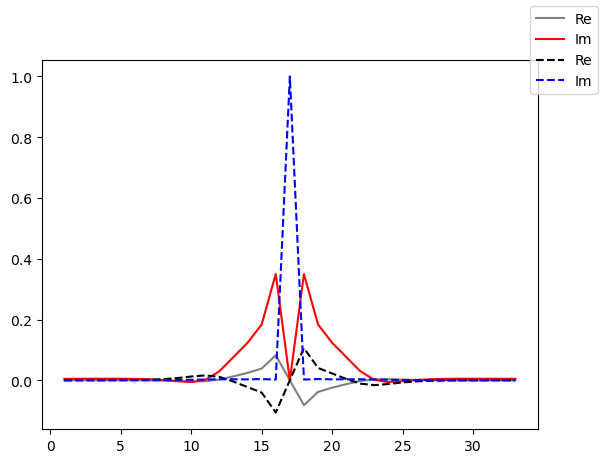

argmax(abs.(K2pprime)) = CartesianIndex(17, 17, 2, 1, 1)


In [181]:
fig, axs = subplots()
ws = 1:33
nn = maximum(abs.(K2pprime[:,:,2,1,2]))
axs.plot(ws, real.(lhs.(ws,17)) ./ nn; label="Re", color="gray")
axs.plot(ws, imag.(lhs.(ws,17)) ./ nn; label="Im", color="red")
axs.plot(ws, real.(rhs.(ws,17)) ./ nn; linestyle="--", color="black", label="Re")
axs.plot(ws, imag.(rhs.(ws,17)) ./ nn; linestyle="--", color="blue", label="Im")
@show argmax(abs.(K2pprime))
fig.legend()
display(fig)